In [ ]:
# @title
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# @title
df = pd.read_csv('table.csv')

In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10535 entries, 0 to 10534
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              10535 non-null  int64 
 1   № заявки                10535 non-null  object
 2   Цех                     10535 non-null  object
 3   Инв. номер              10535 non-null  object
 4   Год выпуска             10535 non-null  int64 
 5   Оборудование            10535 non-null  object
 6   Модель                  10535 non-null  object
 7   Дата открытия           10535 non-null  object
 8   Описание неисправ.      10535 non-null  object
 9   Причина неисправности   10342 non-null  object
 10  Принятые меры           10375 non-null  object
 11  Дата закрытия заявки    10535 non-null  object
 12  data                    10535 non-null  object
 13  day                     10535 non-null  int64 
 14  month                   10535 non-null  int64 
 15  ye

Проверка пропущенных значений

Обработка отсутствующих значений — важный этап предварительной обработки в анализе динамических рядов. Отсутствующие значения могут вызывать проблемы при анализе и искажать результаты прогнозирования. Для проверки пропущенных значений можно использовать метод isnull() из библиотеки pandas:

In [ ]:
# @title
print(df.isnull().sum())

Unnamed: 0                  0
№ заявки                    0
Цех                         0
Инв. номер                  0
Год выпуска                 0
Оборудование                0
Модель                      0
Дата открытия               0
Описание неисправ.          0
Причина неисправности     193
Принятые меры             160
Дата закрытия заявки        0
data                        0
day                         0
month                       0
year                        0
temp                        0
длительность ремонта        0
Категория оборудования      0
dtype: int64


В нужных для нас столбцах  пропуски отсутствуют

In [ ]:
# @title
df['data'] = pd.to_datetime(df['data'])
df

,Unnamed: 0,№ заявки,Цех,Инв. номер,Год выпуска,Оборудование,Модель,Дата открытия,Описание неисправ.,Причина неисправности,Принятые меры,Дата закрытия заявки,data,day,month,year,temp,длительность ремонта,Категория оборудования
0,14540,19-01-006,ЦЕХ 22,5/40,1989,tokapho-peboльb.ct. с чпу,1В340Ф30РМ,2019-01-09,не запускается,выход из строя гл привода,замена гл привода,2019-01-11,2019-01-09,9,1,2019,-10,2 days,Р
1,14541,19-01-011,ЦЕХ 23,5/675,1993,вертикально-фрезерный станок с чпу,6М13НК,2019-01-09,нет движения по z,ош оператора,диагностика,2019-01-09,2019-01-09,9,1,2019,-10,0 days,Ф
2,14542,19-01-015,ЦЕХ 16,9/822,1985,источник питания,ИСВУ-315,2019-01-09,"замкнуло плату, дым",вышел из строя электролит в релейном блоке,замена электролита,2019-01-11,2019-01-09,9,1,2019,-10,2 days,Э
3,14543,19-01-017,ЦЕХ 26,5-778,2013,обрабатывающий центр,E160A,2019-01-09,не выходит в 0,"села батарейка, слетели параметры привязки осей","замена батарейки, волсстановление параметров п...",2019-01-15,2019-01-09,9,1,2019,-10,6 days,Т
4,14544,19-01-007,ЦЕХ 16,3/633,2000,печь вертикальная,6818-2185,2019-01-09,не вкл,неисправна плата тпчт,ремонт платы,2019-01-15,2019-01-09,9,1,2019,-10,6 days,Г
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530,25765,24-11-051,ЦЕХ 23,5-221,2007,5-ти координатный обрабатывающий центр,go-Mill 350,2024-11-11,"ош 04, 403, 419, шторка не закрывается",плохой контакт в замке шторки смены инструмента,диагностика и регулировка замка,2024-11-13,2024-11-11,11,11,2024,1,2 days,А
10531,25766,24-11-046,ЦЕХ 22,1-2698,2007,токарhый ст-к с чпу,SCHAUBLIN-140R CNC,2024-11-11,"не держит размер, шум при перемещении",раскрутилась затяжная гайка на швп,подтянули гайку на швп,2024-11-13,2024-11-11,11,11,2024,1,2 days,Т
10532,25767,24-11-047,ЦЕХ 15,3/537,1985,эл.пeчь kamep.bakуmh.,FHV90GHS,2024-11-11,ремонт вак с-мы,заварена трещина.,заварена трещина.,2024-11-14,2024-11-11,11,11,2024,1,3 days,Г
10533,25768,24-11-048,ЦЕХ 15,3/538,1985,эл.пeчь kamep.bakуmh.,FHV90GHS,2024-11-11,проверка герметичности,проверка выполнена.,проверка выполнена.,2024-11-13,2024-11-11,11,11,2024,1,2 days,Г


In [ ]:
# @title
date_series = pd.to_datetime(df['data'])
date_series

,data
0,2019-01-09
1,2019-01-09
2,2019-01-09
3,2019-01-09
4,2019-01-09
...,...
10530,2024-11-11
10531,2024-11-11
10532,2024-11-11
10533,2024-11-11


In [ ]:
# @title
date_counts = date_series.value_counts()
date_counts = date_counts.sort_index()
date_counts = pd.Series(date_counts.values, index=date_counts.index)
date_counts

,0
data,
2019-01-09,17
2019-01-10,7
2019-01-11,6
2019-01-12,1
2019-01-14,5
...,...
2024-11-06,3
2024-11-07,11
2024-11-08,1


In [ ]:
# @title
full_date_range = pd.date_range(start=date_counts.index.min(), end=date_counts.index.max())
date_counts = date_counts.reindex(full_date_range, fill_value=0)
date_counts

,0
2019-01-09,17
2019-01-10,7
2019-01-11,6
2019-01-12,1
2019-01-13,0
...,...
2024-11-08,1
2024-11-09,0
2024-11-10,0
2024-11-11,5


In [ ]:
# @title
fig = px.line(df,
              x='data',
              y='temp',
              title='Температура по годам',
              color_discrete_map={'demand':'red'}
              )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

temp_df = date_counts.reset_index()
fig2 = px.line(temp_df,
              x='index',
              y=0,
              title='Количество выходов из строя оборудования',
              color_discrete_map={'demand':'red'}
              )

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig2.show()

In [ ]:
# @title
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(date_counts)
adf = dftest[0]
pvalue = dftest[1]
critical_value = dftest[4]['5%']
if (pvalue < 0.05) and (adf < critical_value):
    print('The series is stationary')
else:
    print('The series is NOT stationary')

The series is stationary


In [ ]:
# @title
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(date_counts) * 0.8)
train, test = date_counts[0:train_size], date_counts[train_size:]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
# @title
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2134
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6176.502
Date:                Sun, 22 Dec 2024   AIC                          12361.004
Time:                        16:46:10   BIC                          12383.665
Sample:                             0   HQIC                         12369.297
                               - 2134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1827      0.066     -2.776      0.005      -0.312      -0.054
ma.L1         -0.5200      0.059     -8.838      0.000      -0.635      -0.405
ma.L2         -0.4624      0.058     -7.954      0.000      -0.576      -0.348
sigma2        19.1425      0.502     38.109      0.000      18.158      20.127
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               452.98
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

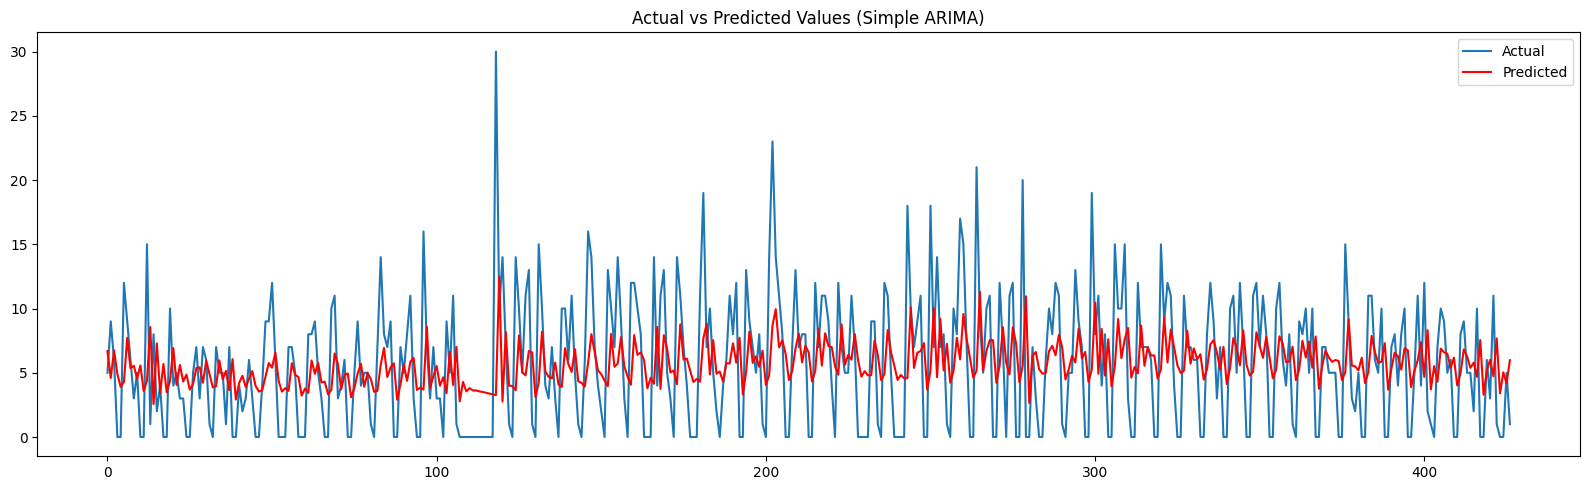

In [ ]:
# @title
plt.figure(figsize=(16, 5))
plt.plot(test.values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values (Simple ARIMA)')
plt.tight_layout()
plt.show()

In [ ]:
# @title
!pip install pmdarima

In [ ]:
# @title
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


train_size = int(len(date_counts) * 0.8)
train, test = date_counts[0:train_size], date_counts[train_size:]

model = auto_arima(
    train,
    start_p=0,
    start_q=0,
    max_p=7,
    max_q=7,
    d=None,
    seasonal=False,
    m=1,
    D=None,
    trace=False,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=False,
)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1708
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -4864.420
Date:                Sun, 22 Dec 2024   AIC                           9740.840
Time:                        16:47:05   BIC                           9773.498
Sample:                    01-09-2019   HQIC                          9752.927
                         - 09-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7598      0.061     28.974      0.000       1.641       1.879
ar.L2         -1.1079      0.077    -14.362      0.000      -1.259      -0.957
ar.L3          0.3471      0.030     11.640      0.000       0.289       0.406
ma.L1         -1.4807      0.063    -23.347      0.000      -1.605      -1.356
ma.L2          0.5215      0.061      8.531      0.000       0.402       0.641
sigma2        17.4005      0.546     31.872      0.000      16.330      18.471
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               307.46
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.92
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

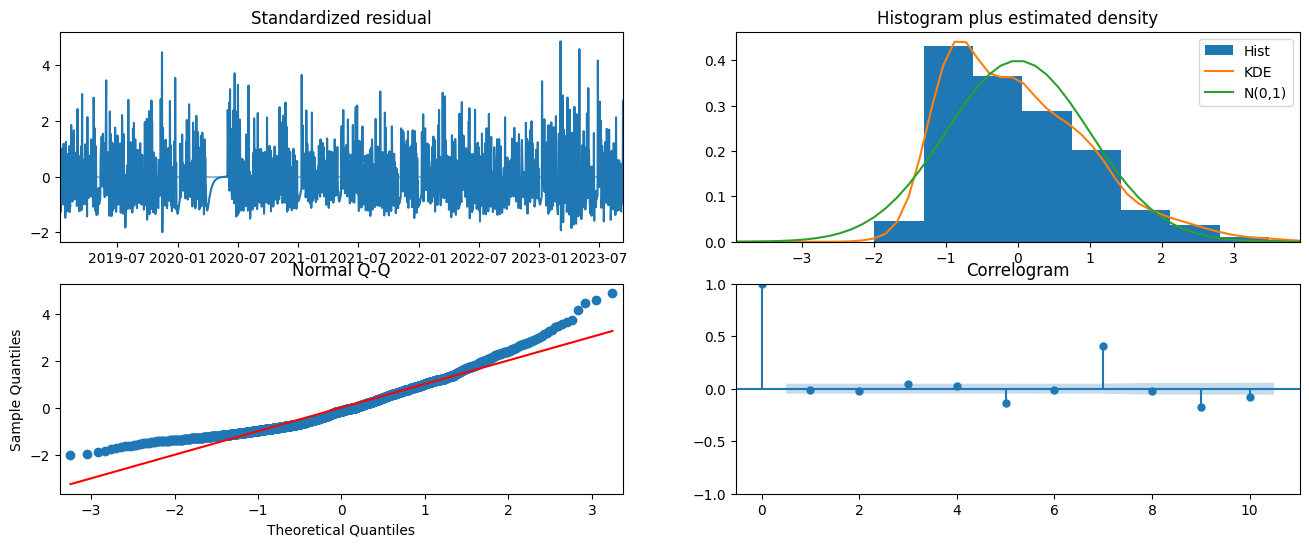

In [ ]:
# @title
model.plot_diagnostics(figsize=(16, 6))
plt.show()

In [ ]:
# @title
optimal_order = model.order
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=optimal_order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

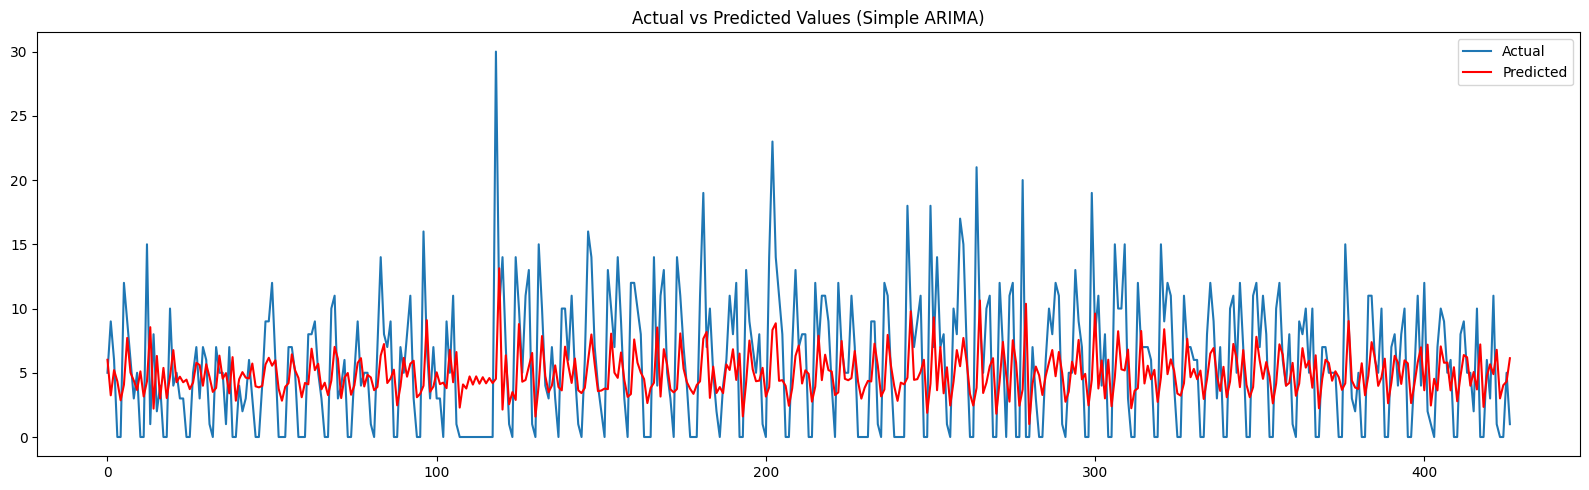

In [ ]:
# @title
plt.figure(figsize=(16, 5))
plt.plot(test.values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted (AUTO ARIMA)')
plt.tight_layout()
plt.show()